# TEST TECHNIQUE DATA SCIENCE-BIG DATA
# ORANGE SUMMER CHALLENGE

## Partie 0: INTRODUCTION

- L'entreprise de E-commerce "ShopSmart" souhaite exploiter ses données de clients pour mieux comprendre les comportements d'achat et améliorer ses stratégies marketing. Notre objectif principal consiste à mener une analyse des données clients pour extraire des insights précieux. A cet effet, il nous est confié le jeu de données "Online_Retail.csv".
- Cette ensemble de données  contient des informations sur les transactions effectuées par les clients par l'intermédiaire d'une plateforme de vente en détail en ligne.Il comprend des données sur les produits achetés, la quantité de chaque produit, la date et l'heure de chaque transaction, le prix de chaque produit, l'identifiant unique de chaque client ayant effectué un achat et le pays où se trouve chaque client. 
- A l'aide de nos outils d'analyse, de manipulation, de visualisation et de modélisation des données, nous apporterons des conclusions sur les comportements d'achat des clients et par ailleurs des  recommendations dans le but d'enrichier les stratégies marketing.
- Notre ensemble de données comporte les informations des achats en ligne de nos clients.Nous observons ici 541909 données regroupées en 8 variables définies comme suit:
- InvoiceNo: le numéro de la transaction 
- StockCode : Un code utilisé pour identifier le produit qui a été acheté
- Description : Brève description du produit acheté
- Quantité : La quantité du produit acheté : La quantité du produit acheté
- InvoiceDate : La date et l'heure auxquelles l'achat a été effectué
- UnitPrice : Prix d'une unité du produit acheté
- CustomerID : L'identifiant unique du client qui a effectué l'achat.
- Country  : Le pays dans lequel le client a effectué l'achat : Le pays où se trouve le client qui a effectué l'achat



## Partie 1: Pré-traitement des données

### Importation des bibliothèques nécessaires

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
%matplotlib inline


from sklearn.metrics import accuracy_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances,davies_bouldin_score,adjusted_rand_score
from scipy.cluster.hierarchy import linkage, fcluster, cut_tree
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist



### Importation du jeu de données

In [32]:
customer_data=pd.read_csv("transactions_retail.csv",delimiter=";",encoding='unicode_escape')
customer_data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

  InvoiceDate  UnitPrice  CustomerID         Country  
0  12/01/2010       2.55     17850.0  United Kingdom  
1  12/01/2010       3.39     17850.0  United Kingdom  
2  12/01/2010       2.75     17850.0  United Kingdom  
3  12/01/2010       3.39     17850.0  United Kingdom  
4  12/01/2010       3.39     17850.0  United Kingdom

In [14]:
### Caractéristiques du dataset 
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [80]:
## change the format of variable 'InvoiceDate'
customer_data['InvoiceDate']=pd.to_datetime(customer_data['InvoiceDate'],errors='coerce')

In [5]:
## vérification des données manquantes 
customer_data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

- Nous constatons que dans notre jeu de données, les colonnes description et CustomerID comporte des valeurs manquantes. 
- La variable "description" correspondant à une description du produit acheté ne peut être remplacé donc nous allons supprimer les données de même que la variable "CustomerID" correspondant aux identifiants uniques de chaque client

In [33]:
customer_data=customer_data.dropna()

In [4]:
customer_data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

## PARTIE 2: Analyse Exploratoire des données

In [81]:
customer_data_Features = []
for i in customer_data.columns:
    customer_data_Features.append([i, customer_data[i].nunique(), customer_data[i].drop_duplicates().values, customer_data[i].value_counts().to_frame(),customer_data[i].count(), customer_data[i].dtype])
pd.DataFrame(customer_data_Features, columns = ['Features', 'Unique', 'Values', 'count values', 'count', 'Type'])


Features  Unique                                             Values  \
0    InvoiceNo   22189  [536365, 536366, 536367, 536368, 536369, 53637...   
1    StockCode    3684  [85123A, 71053, 84406B, 84029G, 84029E, 22752,...   
2  Description    3896  [WHITE HANGING HEART T-LIGHT HOLDER, WHITE MET...   
3     Quantity      40  [6, 8, 2, 27, 3, 4, 24, 12, 18, 20, 10, 23, 5,...   
4  InvoiceDate     127  [2010-12-01T00:00:00.000000000, 2010-12-02T00:...   
5    UnitPrice     306  [2.55, 3.39, 2.75, 7.5, 4.25, 1.85, 1.69, 2.1,...   
6   CustomerID    4372  [17850.0, 13047.0, 12583.0, 13748.0, 15100.0, ...   
7      Country      37  [35, 13, 0, 23, 14, 24, 10, 32, 30, 25, 26, 18...   

                                        count values   count            Type  
0             count
InvoiceNo       
576339      ...  406828          object  
1             count
StockCode       
85123A      ...  406828          object  
2                                      count
Desc...  406828          object  
3            count
Quantity       
 1        7331...  406828           int64  
4               count
InvoiceDate       
2011-11-...  172781  datetime64[ns]  
5             count
UnitPrice       
1.25       4...  406828         float64  
6              count
CustomerID       
17841.0   ...  406828         float64  
7            count
Country        
35       36187...  406828           int32

- En somme, notre jeu de données contient 406829 données reparties en 8 variables de type objet (InvoiceNo,StockCode, Description,Country) ,de type entier (Quantity) et de type Float(UnitPrice,CustomerID).
- Par ailleurs, nous observons que les transactions d'achat sont effectués en ligne uniquement dans 37 pays dans le monde.
- De même, nous comptons uniquement 4372 clients que nous pouvons classer de fidèles et qui commandent généralement dans notre entreprise juste 3896 produits.


### Analyse descriptive des données


In [5]:
customer_data.describe()

Quantity      UnitPrice     CustomerID
count  406829.000000  406829.000000  406829.000000
mean       12.061303       3.460471   15287.690570
std       248.693370      69.315162    1713.600303
min    -80995.000000       0.000000   12346.000000
25%         2.000000       1.250000   13953.000000
50%         5.000000       1.950000   15152.000000
75%        12.000000       3.750000   16791.000000
max     80995.000000   38970.000000   18287.000000

- De cette analyse nous constatons que nous avons au maximum 80995 produits qui ont été acheté dont 25% des clients ont juste acheté 2 produits.
- Par la suite, les clients achète en moyenne des produits dont le prix en unité est de 3.46$, 75% de nos clients achètent des produits dont le prix à l'unité est de 3.75$



In [34]:
df=customer_data[customer_data['UnitPrice']==38970.00]
df

InvoiceNo StockCode Description  Quantity InvoiceDate  UnitPrice  \
222681   C556445         M      Manual        -1  06/10/2011    38970.0   

        CustomerID         Country  
222681     15098.0  United Kingdom

- De cette analyse, on peut conclure que le client d'identifiant Unique 15098.0 résidant en Grande Bretagne a commandé le produit 'Manual' qui a le prix le plus élevé. Et ainsi, il commande un seul produit. Pour la suite de notre analyse, nous allons supprimer cette ligne

In [35]:
customer_data.drop(222681,axis=0,inplace=True)

In [36]:
df2=customer_data[customer_data['Quantity']==80995]
df2

InvoiceNo StockCode                  Description  Quantity InvoiceDate  \
540421    581483     23843  PAPER CRAFT , LITTLE BIRDIE     80995  12/09/2011   

        UnitPrice  CustomerID         Country  
540421       2.08     16446.0  United Kingdom

- Ainsi, nous observons que la plus grosse commande a été effectué par un client résidant en Grande Bretagne qui achète 80995 produits de description 'PAPER CRAFT,LITTLE BIRDIE'

### Détection des outliers


In [37]:
numerical=['Quantity','UnitPrice']

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


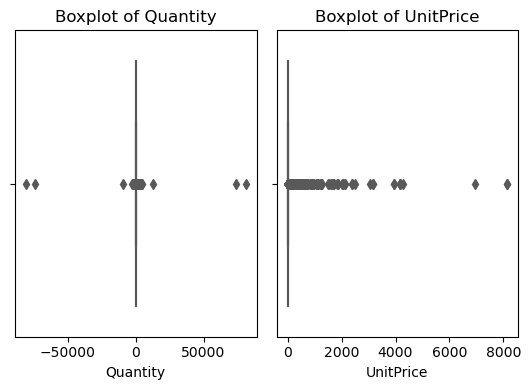

In [38]:
def boxplot(customer_data):
    plt.figure(figsize=(8,4))
    for i, col in enumerate(numerical):
        ax = plt.subplot((len(numerical)//3)+1, 3, i+1)
        sns.boxplot(data=customer_data, x=col, ax=ax, palette='Set2')
        ax.set_title(f"Boxplot of {col}")
    plt.tight_layout()
boxplot(customer_data)

In [42]:
def replaceAttypicalValues():
    for col in numerical:
        IQR = customer_data[col].quantile(0.75) - customer_data[col].quantile(0.25)
        Lower = customer_data[col].quantile(0.25) - (1.5*IQR)
        upper = customer_data[col].quantile(0.75) + (1.5*IQR)
        
        for i in range(len(customer_data[col].values)):
            if(customer_data[col].values[i]>upper):
                customer_data[col].values[i]=upper
            if (customer_data[col].values[i]<Lower):
                customer_data[col].values[i]=Lower

In [43]:
replaceAttypicalValues()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


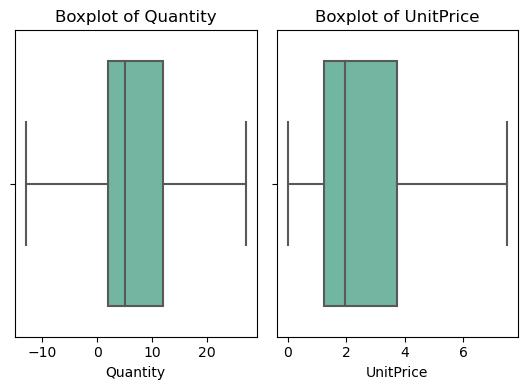

In [44]:
boxplot(customer_data)

- Nous venons de remplacer les valeurs abérrantes

### Visualisation des données 

In [47]:
customer_data['Country'].nunique()

37

Text(0, 0.5, 'Pays')

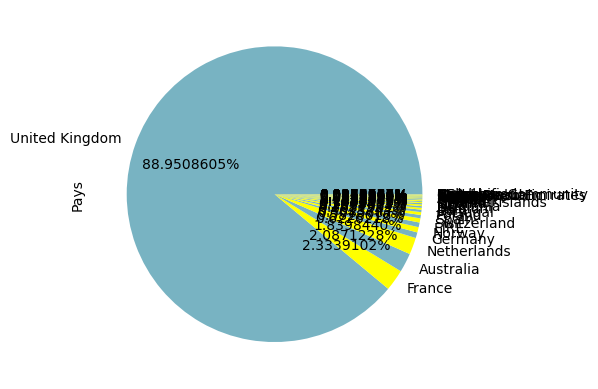

In [55]:
proportions = customer_data['Country'].value_counts(normalize=True)
labels=customer_data['Country'].unique().tolist()
colors=['#78b3c2','yellow']
# Tracer un diagramme en secteurs (pie chart) des proportions
proportions.plot.pie(labels=labels,colors=colors,autopct='%1.7f%%')
plt.ylabel('Pays')

- De ce graphe nous pouvons conclure que la Grande-Bretagne est le pays dont les clients commandent le maximum de prduits, suivi de la France et de l'Australie mais en faible quantité.

### Matrice de correlation


In [69]:
sns.set_theme(style="darkgrid")

def plot_corr_map(data, **kwargs):

    _, ax = plt.subplots(figsize=(10, 4))
    sns.heatmap(data=data.corr(), ax=ax, **kwargs)
    ax.set_title('Matrice de correlation', fontsize=18)

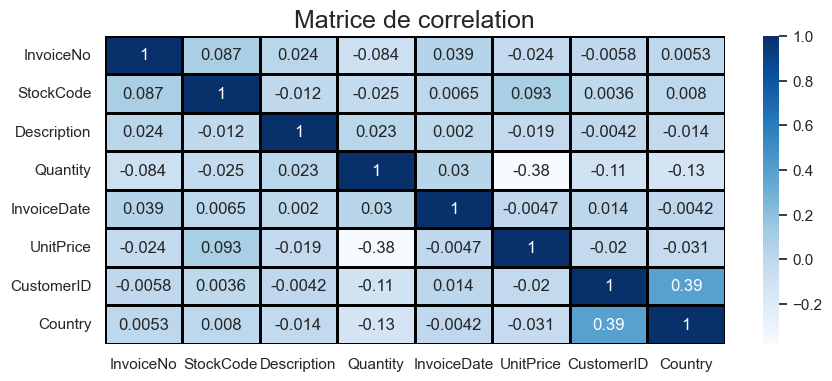

In [72]:
params = {'annot': True, 'fmt': '.2g', 'cmap': 'Blues',
          'linewidths': 1, 'linecolor': 'black'}

# We need to encode the string nominal columns to numbers
encoded_df = customer_data.iloc[:, :].copy()
columns = encoded_df.select_dtypes(include=['object']).columns
ordinal_encoder = OrdinalEncoder()
encoded_df[columns] = ordinal_encoder.fit_transform(encoded_df[columns])

plot_corr_map(encoded_df, **params)

- De ce Tableau, nous constatons que les variables CustomerID et Country sont correlées positivement (soit de 0.39) de même que les variables quantity et Unitprice mais négativement (soit de -0.38)
- De cette analyse, nous pouvons conclure que plus les prix des produist à l'unité sont élevées, moins les clients en achètent.

## PARTIE 3: Modélisation

### Encodage
- Compte tenu du fait que les variables 'Country','InvoiceNo','StockCode' et 'Description' est en objet nous allons les encoder

In [86]:
customer_data.drop('InvoiceDate',axis=1,inplace=True)

In [75]:
## Encodage des variables catégorielles
from sklearn import preprocessing
label_encoder= preprocessing.LabelEncoder()
customer_data['Country'] = label_encoder.fit_transform(customer_data['Country'])

In [87]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406828 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406828 non-null  int32  
 1   StockCode    406828 non-null  int32  
 2   Description  406828 non-null  int32  
 3   Quantity     406828 non-null  int64  
 4   UnitPrice    406828 non-null  float64
 5   CustomerID   406828 non-null  float64
 6   Country      406828 non-null  int32  
dtypes: float64(2), int32(4), int64(1)
memory usage: 34.7 MB


In [88]:
from sklearn import preprocessing
label_encoder1= preprocessing.LabelEncoder()
customer_data['InvoiceNo'] = label_encoder1.fit_transform(customer_data['InvoiceNo'])


from sklearn import preprocessing
label_encoder2= preprocessing.LabelEncoder()
customer_data['StockCode'] = label_encoder2.fit_transform(customer_data['StockCode'])

from sklearn import preprocessing
label_encoder3= preprocessing.LabelEncoder()
customer_data['Description'] = label_encoder3.fit_transform(customer_data['Description'])

In [89]:
##  Standardisation 
## Standardisation
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler =MinMaxScaler()

# Scale the DataFrame
scaled_data = scaler.fit_transform(customer_data)

### 1- Identification des segments de clients: Classification ascendante hiérachique (CAH)

- Compte tenu du grand nombre de données que nous avons, nous allons selectionner un échantillon aléatoire de 1000 données afin d'effectuer notre analyse 

In [90]:
# Select the subset of sample data for clustering
data_subset = customer_data.sample(n=1000) 

In [91]:
# Scale the DataFrame extrait
scaled_data = scaler.fit_transform(data_subset)

In [93]:
## transform scaled_df to dataframe
scaled_df=pd.DataFrame(scaled_data,columns=data_subset.columns)

In [94]:
scaled_df.set_index(pd.RangeIndex(start=0, stop=1000))

InvoiceNo  StockCode  Description  Quantity  UnitPrice  CustomerID  \
0     0.539738   0.365296     0.550605     0.375   0.207317    0.749158   
1     0.217541   0.368020     0.973217     0.475   0.789973    0.101752   
2     0.716908   0.840098     0.325006     0.375   0.317073    0.294643   
3     0.021429   0.419777     0.739119     0.475   0.383469    0.449966   
4     0.810127   0.596023     0.133660     0.350   0.491870    0.104953   
..         ...        ...          ...       ...        ...         ...   
995   0.673192   0.594116     0.022405     0.575   0.094851    0.060310   
996   0.806917   0.486244     0.025238     0.925   0.058266    0.069912   
997   0.324593   0.407518     0.898017     0.825   0.207317    0.729616   
998   0.378662   0.220648     0.056142     1.000   0.040650    0.067554   
999   0.754747   0.294198     0.670616     0.625   0.098916    0.746631   

      Country  
0    0.972222  
1    0.972222  
2    0.972222  
3    0.972222  
4    0.972222  
..        ...  
995  0.388889  
996  0.722222  
997  0.972222  
998  0.972222  
999  0.972222  

[1000 rows x 7 columns]

In [95]:
#centrage-réductiondes variables
from sklearn import preprocessing

from scipy.cluster import hierarchy

In [96]:
#construction de la typologie 
Z = linkage(scaled_df,method='ward',metric='euclidean')

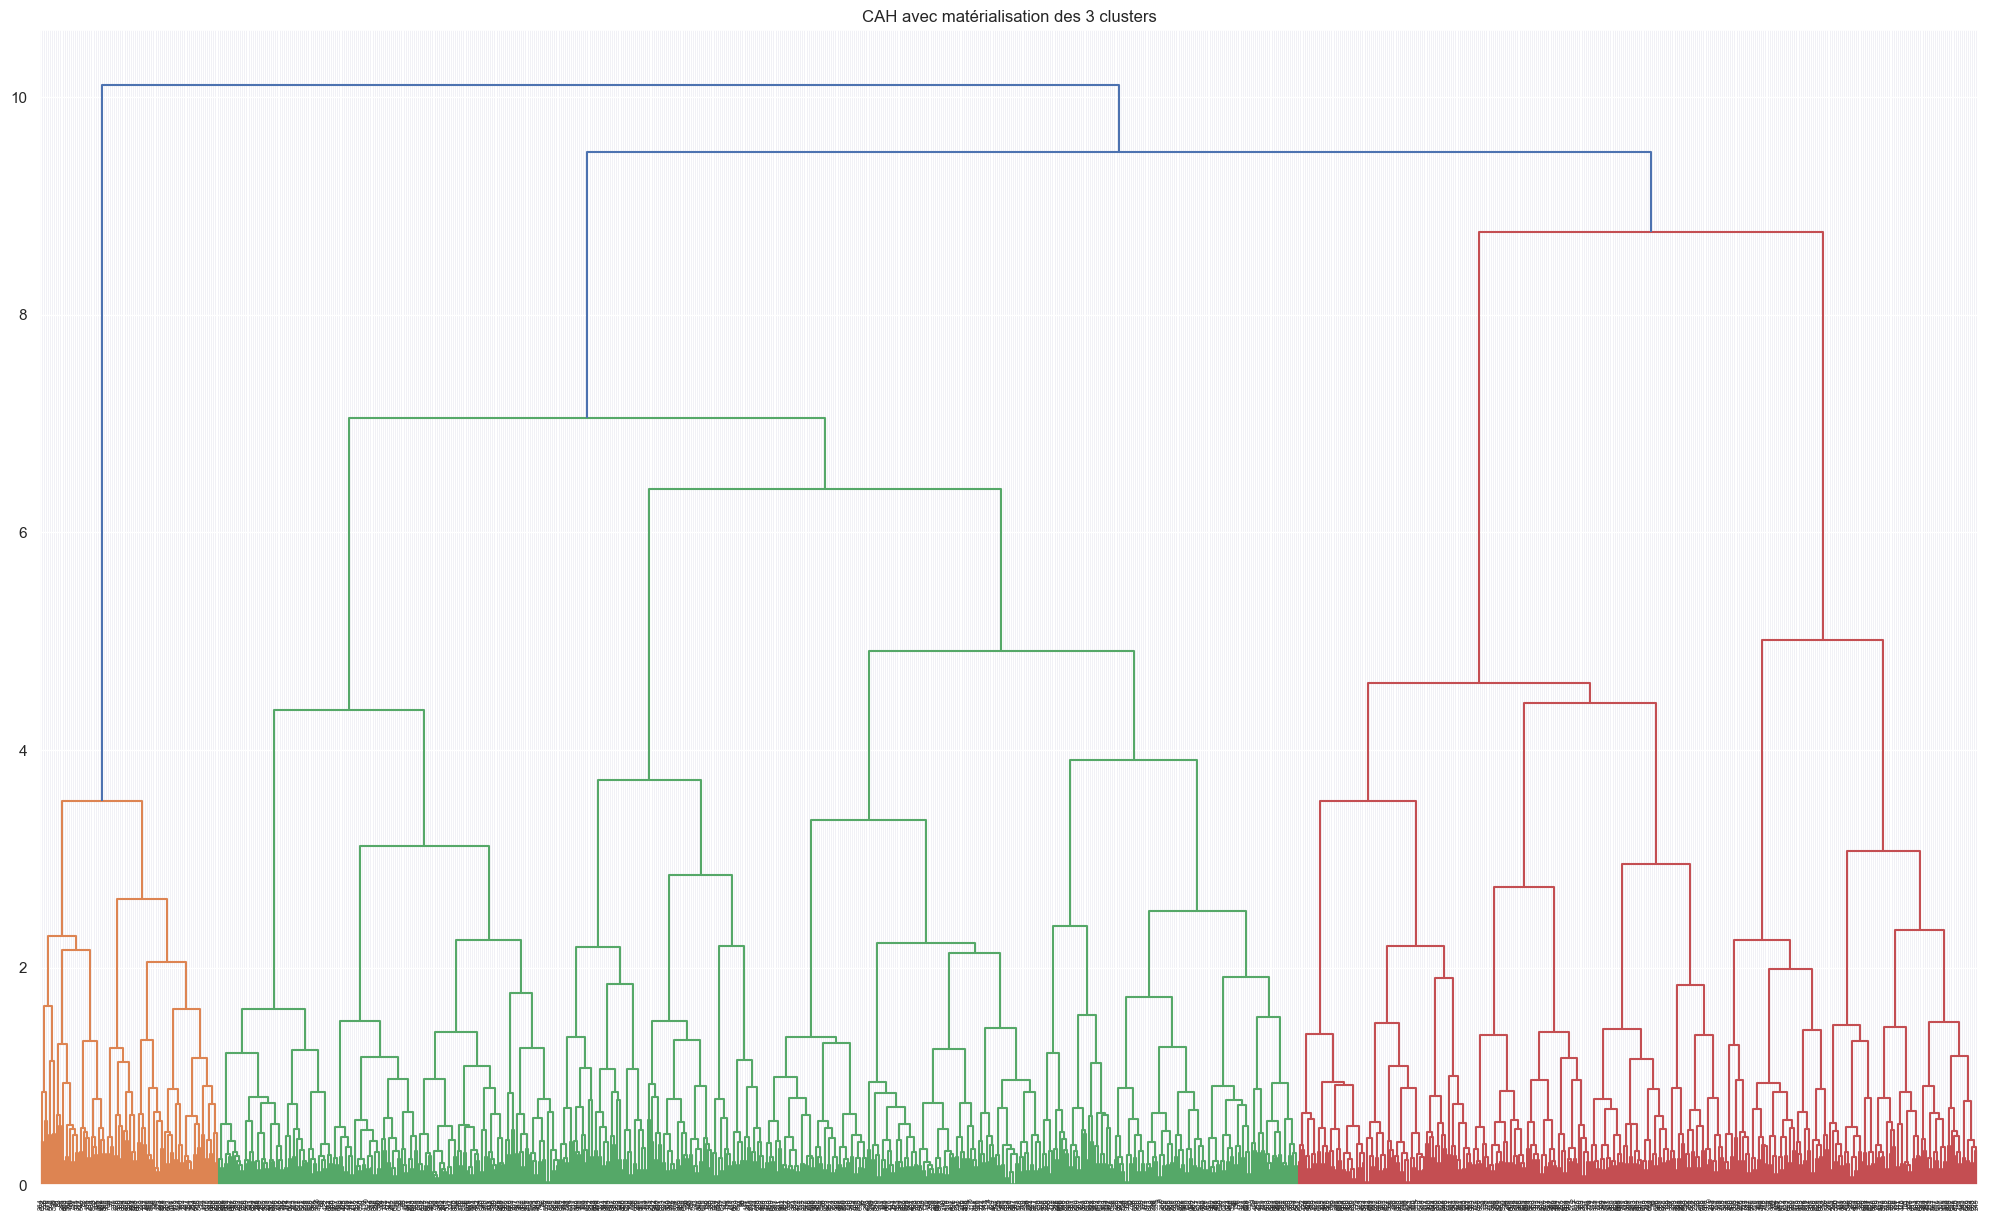

In [109]:
plt.figure(figsize=(25,15))
plt.title('CAH avec matérialisation des 3 clusters')
hierarchy.dendrogram(Z,orientation='top',color_threshold=9)
plt.show()

In [103]:
#découpage à la hauteur = 5 ==> 3 identifiants de groupes obtenus
groupes_cah= fcluster(Z,t=15,criterion='distance')


In [104]:
# affichage des observations et leurs groupes
df1=pd.DataFrame(groupes_cah,columns=['Classes'])
df1

Classes
0          1
1          1
2          1
3          1
4          1
..       ...
995        1
996        1
997        1
998        1
999        1

[1000 rows x 1 columns]

In [105]:
df_final=pd.concat([scaled_df,df1],axis=1)
df_final

InvoiceNo  StockCode  Description  Quantity  UnitPrice  CustomerID  \
0     0.539738   0.365296     0.550605     0.375   0.207317    0.749158   
1     0.217541   0.368020     0.973217     0.475   0.789973    0.101752   
2     0.716908   0.840098     0.325006     0.375   0.317073    0.294643   
3     0.021429   0.419777     0.739119     0.475   0.383469    0.449966   
4     0.810127   0.596023     0.133660     0.350   0.491870    0.104953   
..         ...        ...          ...       ...        ...         ...   
995   0.673192   0.594116     0.022405     0.575   0.094851    0.060310   
996   0.806917   0.486244     0.025238     0.925   0.058266    0.069912   
997   0.324593   0.407518     0.898017     0.825   0.207317    0.729616   
998   0.378662   0.220648     0.056142     1.000   0.040650    0.067554   
999   0.754747   0.294198     0.670616     0.625   0.098916    0.746631   

      Country  Classes  
0    0.972222        1  
1    0.972222        1  
2    0.972222        1  
3    0.972222        1  
4    0.972222        1  
..        ...      ...  
995  0.388889        1  
996  0.722222        1  
997  0.972222        1  
998  0.972222        1  
999  0.972222        1  

[1000 rows x 8 columns]

In [107]:
original_data_subset=scaler.inverse_transform(scaled_df)
original_data_subset=pd.DataFrame(original_data_subset,columns=customer_data.columns)
original_data_subset

InvoiceNo  StockCode  Description  Quantity  UnitPrice  CustomerID  \
0      11977.0     1353.0       2146.0       2.0       1.65     16794.0   
1       4850.0     1363.0       3787.0       6.0       5.95     12951.0   
2      15896.0     3096.0       1270.0       2.0       2.46     14096.0   
3        512.0     1553.0       2878.0       6.0       2.95     15018.0   
4      17958.0     2200.0        527.0       1.0       3.75     12970.0   
..         ...        ...          ...       ...        ...         ...   
995    14929.0     2193.0         95.0      10.0       0.82     12705.0   
996    17887.0     1797.0        106.0      24.0       0.55     12762.0   
997     7218.0     1508.0       3495.0      20.0       1.65     16678.0   
998     8414.0      822.0        226.0      27.0       0.42     12748.0   
999    16733.0     1092.0       2612.0      12.0       0.85     16779.0   

     Country  
0       35.0  
1       35.0  
2       35.0  
3       35.0  
4       35.0  
..       ...  
995     14.0  
996     26.0  
997     35.0  
998     35.0  
999     35.0  

[1000 rows x 7 columns]

In [ ]:
# Convert the mixed columns to strings
original_data_subset[mixed_columns] = original_data_subset[mixed_columns].astype(int)

In [108]:
features_to_encode = ['InvoiceNo']
original_data_subset['InvoiceNo'] = label_encoder1.inverse_transform(original_data_subset['InvoiceNo'])


ValueError: y contains previously unseen labels: [   85.   449.  1390.  1399.  1479.  1486.  1541.  1893.  1925.  2814.
  2819.  2965.  2972.  3219.  3244.  3482.  3523.  3626.  3802.  4033.
  4063.  5589.  5713.  5727.  5781.  5809.  5873.  5894.  5898.  6164.
  6186.  6424.  6509.  6573.  6719.  6758.  6776.  6989.  7010.  7177.
  7295.  7312.  7405.  7526.  7543.  7586.  7622.  7625.  7956.  7995.
  8148.  8172. 11198. 11241. 11327. 11441. 11483. 11504. 11512. 11539.
 11667. 11889. 11994. 12023. 12044. 12073. 12109. 12151. 12223. 12258.
 12506. 12514. 12543. 12678. 12719. 12726. 12756. 12819. 12911. 12948.
 12989. 13182. 13225. 13252. 13331. 13353. 13380. 13594. 13602. 13750.
 13836. 13885. 13899. 14007. 14013. 14099. 14162. 14283. 14334. 14454.
 14476. 14496. 14533. 14661. 14732. 14767. 14781. 14852. 14874. 14895.
 14994. 15029. 15051. 15058. 15087. 15122. 15342. 15371. 15400. 15456.
 15655. 15726. 15770. 15805. 15826. 15932. 15976. 16004. 16096. 16117.
 16160. 16174. 16253. 16266. 16374.]

In [ ]:
features_to_encode = ['StockCode']
original_data_subset['StockCode'] = label_encoder2.inverse_transform(original_data_subset['StockCode'])

In [ ]:
features_to_encode = ['Description']
original_data_subset['Description'] = label_encoder2.inverse_transform(original_data_subset['Description'])

In [ ]:
features_to_encode = ['Country']
original_data_subset['Country'] = label_encoder2.inverse_transform(original_data_subset['Country'])